In [1]:
import pandas as pd
train_la = pd.read_csv('Cleantrain.csv')
test = pd.read_csv('Cleantestdata.csv')

In [2]:
#训练word2vec
train_la.head(5)

,id,content,picture_lists,category,ncw_label,fake_label,real_label,comment_2c,comment_all,label
0,4028762460708675,回复 新浪 网友 博文 国家文物局 鉴宝 节目 现场 估价 转 评论 ...,NaN,文体娱乐,0,0,1,NaN,NaN,2
1,4126670854660291,分享 网易 新闻 发生 昆明 火锅店 老板 辱 滇门 云南 人该 愤怒...,63ad082a189566eed7c4bb3e4bc55012.jpg,社会生活,0,0,1,NaN,NaN,2
2,3702441948299962,西宁 城管 围殴 民警 扬言 警察 打死 西宁 城管 围,4986dc2a5f09a87c7af5dfc57d7775cd.jpg,社会生活,0,0,1,NaN,NaN,2
3,4239549419245466,川航 航班 驾驶舱 风挡 破裂 备降 成都 今天上午 26 重庆江北国际机...,dcfccfc69e90a0007afd6aafa1385e56.jpg,社会生活,0,0,1,NaN,NaN,2
4,3966337217183260,支持 郑强 贵州大学 校长 回应 空姐 言论 常给 写 感谢信,NaN,社会生活,0,0,1,NaN,NaN,2


In [3]:
# train_la_xing=train_la["content"].apply(lambda x : x.replace("[",""))
# train_la["content"]=train_la_xing
# train_la_xing=train_la["content"].apply(lambda x : x.replace("]",""))
# train_la["content"]=train_la_xing
# train_la_xing=train_la["content"].apply(lambda x : x.replace(","," "))
# train_la["content"]=train_la_xing
# train_la_xing=train_la["content"].apply(lambda x:str(x).replace("'",""))
# train_la["content"]=train_la_xing
# train_la.head(5)

In [4]:
test.head(5)

,id,content,picture_lists,category,comment_2,comment_all
0,fb7abd30e64904d4aec80913f39c2a4d,口罩 害怕 唾沫 关系 街上 行人 脚步声 打印 店 打印 东西 店里...,NaN,疫情,NaN,NaN
1,33862231893127fa396812b4fa9cc709,台词 汇编 457 万善公 两周 钟南山 院士 呼吁 解决 疫情 最快 ...,NaN,疫情,NaN,NaN
2,0fe350647b75a2729c9b6d5604fa4baa,武汉 撤回 日本 迎接 每人 一台 救护车 206 206 台 救护车 ...,NaN,疫情,NaN,NaN
3,7de07ad7a1eacff14b0ab88303bde62b,武汉 地铁 钟 院士 防病毒 高招 医院 公共场合 淡盐水 漱 咽喉 ...,NaN,疫情,NaN,NaN
4,73952631593ee8f33a9b42bd66caaf96,事情 说 三遍 钟南山 院士 呼吁 钟南山 院士 呼吁 钟南山 院士 ...,NaN,疫情,NaN,NaN


In [5]:
#保存新的csv
# train_la.to_csv('Cleantrain.csv', index=False,encoding='utf-8-sig')

In [6]:
#将content写入txt文件，一条一行，用空格隔开
# train_la["content"].to_csv('Cleantrain_con.txt', sep='\t',index=False,encoding='utf-8-sig')

In [7]:
# test_xing=test["content"].apply(lambda x : str(x).replace("[",""))
# test["content"]=test_xing
# test_xing=test["content"].apply(lambda x : str(x).replace("]",""))
# test["content"]=test_xing
# test_xing=test["content"].apply(lambda x : str(x).replace(","," "))
# test["content"]=test_xing
# test_xing=test["content"].apply(lambda x:str(x).replace("'",""))
# test["content"]=test_xing
# test.head(5)

In [8]:
# test.to_csv('Cleantestdata.csv', index=False,encoding='utf-8-sig')

In [9]:
# test["content"].to_csv('test_con.txt', sep='\t',index=False,encoding='utf-8-sig')

In [10]:
#将两个文件合并得到词向量
file2 = 'test_con.txt'
file1 = 'Cleantrain_con.txt'
 
def merge(file1, file2):
    f1 = open(file1, 'a+', encoding='utf-8')
    with open(file2, 'r', encoding='utf-8') as f2:
        f1.write('\n')
        for i in f2:
            f1.write(i)
 
 
merge(file1, file2)

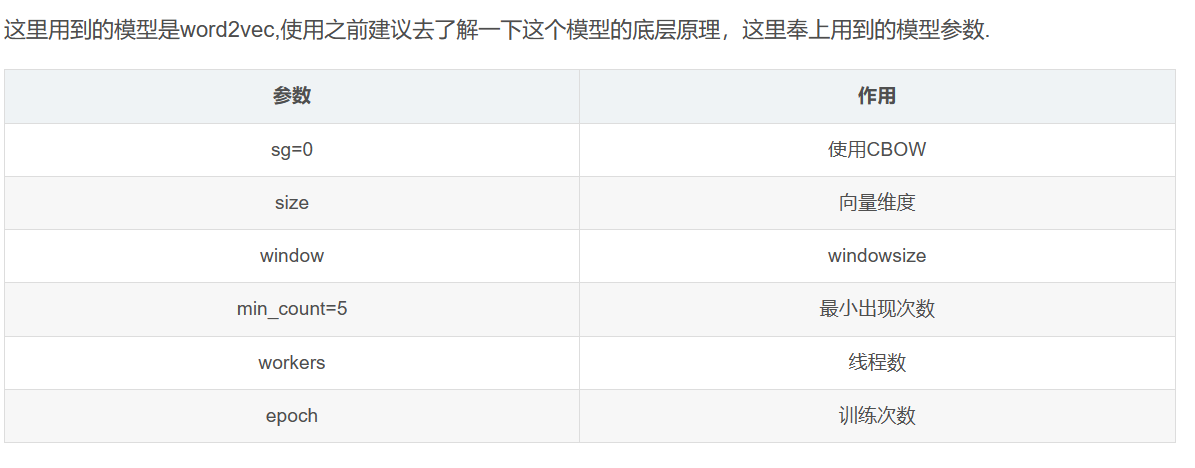

In [11]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
 
model = Word2Vec(
    LineSentence(open('Cleantrain_con.txt', 'r', encoding='utf8')),
    sg = 0,
    vector_size = 50,
    window = 3,
    min_count = 1,
    workers=8
)
 
# 词向量保存
model.wv.save_word2vec_format('train_data.vector', binary=False)
 
# 模型保存
model.save('word2vec_train.model')


In [12]:
dic = model.wv.index_to_key
print("词汇表长度",len(dic))

词汇表长度 128816


In [13]:
print(model.wv['武汉'])

[ 0.88319427 -0.5023909   1.405137   -0.873909    1.9735001  -2.200154
 -2.372463    1.2746826   1.6870766  -0.47160175  1.4494121   0.19466233
  4.7993035   0.82202625  0.11612961  1.0758716   1.4120978   0.51839906
 -2.3357246   0.9960667   0.30877775  2.3539662   1.8536891  -0.31261277
  0.99058074 -1.4865106  -1.3897864   1.985193   -1.1843257   2.3177633
  1.338769   -2.086028   -3.020396    2.3164818  -1.7827847  -2.9867442
  1.6043191  -4.170893    0.24093908 -1.2745988   3.0963619  -5.1217494
  3.0697901  -2.1001315   0.28251752  0.8655159  -3.4185536  -0.04340727
  1.3728338   1.2405168 ]


In [14]:
print(model.wv['口罩'])

[ 1.1057594   1.0471612   1.3963753   0.90236545 -2.301561   -2.0022032
 -2.219478   -1.6410098   2.8110673   1.6931907  -0.03714948 -0.6964578
  1.7669585  -2.549644   -0.53169954 -2.816319    0.13490932  0.8401459
  0.2748022   3.5489025   1.2332885   5.502897   -1.0521729  -5.662835
  1.0079304   4.2955422  -3.8908663  -1.2653482  -3.53942    -0.2071965
 -3.414755   -3.9658105  -4.5041003   2.2734134  -1.1703358   0.71306807
  3.8190873  -0.433042    1.2922766  -0.74317163 -0.6425602  -4.503017
  0.19038324 -2.06396     3.7908463  -0.06578478 -2.266265    0.48649943
 -2.3072875  -5.256079  ]


In [15]:
print(model.wv['唾沫'])

[-0.02655585 -0.02339591  0.03144566 -0.03002799 -0.00319599 -0.02884556
 -0.08341576 -0.02089465  0.03419587  0.00859502 -0.01328136  0.01965593
  0.03514738  0.08547387 -0.08345377 -0.09534996 -0.05952328  0.01161837
 -0.0177591  -0.02270339 -0.00519109  0.05764148  0.05598534 -0.08130128
  0.06901877 -0.10806488 -0.07334326 -0.02112707 -0.0731952   0.05729877
  0.09878684 -0.00760174 -0.07604466  0.03895349  0.00941262  0.01387825
  0.02026745  0.0141306   0.096076   -0.09703253 -0.01186116 -0.02830399
  0.05335252  0.10099091  0.01909783  0.03108286 -0.04758712 -0.08265017
 -0.00811065 -0.13841069]


In [16]:
a=train_la["content"][1].split(' ')
a

['分享',
 '',
 '网易',
 '',
 '新闻',
 '',
 '发生',
 '',
 '昆明',
 '',
 '火锅店',
 '',
 '老板',
 '',
 '辱',
 '',
 '滇门',
 '',
 '云南',
 '',
 '人该',
 '',
 '愤怒',
 '',
 '羞愧',
 '',
 '发生',
 '',
 '昆明',
 '',
 '网易',
 '',
 '新闻',
 '',
 '客户端',
 '',
 '网易',
 '',
 '新闻']

In [17]:
for i in a:
    if i==" " or i=="":
        continue
    print(i)
    print(model.wv[i])


分享
[-2.41481113e+00  6.94581211e-01  3.19842458e-01  2.85594821e-01
 -2.32260895e+00 -1.07950222e+00 -1.06229031e+00  2.12361646e+00
 -1.43358875e-02  3.78065538e+00 -1.56292331e+00 -2.61136818e+00
 -1.52325854e-01  1.52235794e+00 -3.92933130e-01 -3.08467865e-01
  5.25207102e-01  1.45451486e+00 -1.03644896e+00 -2.43514791e-01
  3.69381070e-01  2.39611387e+00  4.07600075e-01  6.71514392e-01
  2.46796942e+00  2.38870591e-01  3.75203967e-01  1.33178937e+00
  1.74011216e-01 -1.40491462e+00 -4.26629066e-01  2.37990305e-01
  6.09818548e-02  1.32361042e+00 -8.08881700e-01  8.11136305e-01
  1.51542330e+00  9.93297458e-01 -2.07254362e+00  1.23240542e+00
  1.75673807e+00 -6.10330224e-01 -2.63329297e-01  5.58599889e-01
  6.59982488e-02  2.79319614e-01 -5.85713923e-01 -1.54537797e+00
  2.61071420e+00 -1.82842754e-03]
网易
[-2.5291796   0.7265136   1.07811    -0.2559841  -2.8367321  -0.79214466
 -1.4457436   1.1272237   0.9604811   4.064241    0.15836164 -1.4476275
  0.5327238   1.1377118   0.6502785

In [39]:
b=str(train_la["content"][1].split(' '))
b

"['分享', '', '网易', '', '新闻', '', '发生', '', '昆明', '', '火锅店', '', '老板', '', '辱', '', '滇门', '', '云南', '', '人该', '', '愤怒', '', '羞愧', '', '发生', '', '昆明', '', '网易', '', '新闻', '', '客户端', '', '网易', '', '新闻']"

In [42]:
#将词向量嵌入列表中，将每一行的词向量取平均值
import numpy as np
word_vec=np.zeros((1,50))
data_wordvec=[]
i=0
for i in range(train_la.shape[0]):
    word_vec=np.zeros((1,50))
    for word in str(train_la["content"][i]).split(' '):
        if word!=" " and word!='':       
            word_vec+=np.array(model.wv[word])
    data_wordvec.append(word_vec.mean(axis=0))
word_vec=pd.Series(data_wordvec)
word_vec    
    

0        [-15.107627621851861, -3.130313839763403, 6.17...
1        [-29.218504855874926, 6.359743680804968, 19.21...
2        [-6.408814363181591, 0.11974392458796501, 9.80...
3        [-45.27669252501801, -16.633872096426785, 7.42...
4        [-14.163292698562145, 3.8079536091536283, 1.44...
5        [-32.70391799323261, 2.61914143897593, 35.3977...
6        [-30.4024200104177, -41.786241725087166, 27.52...
7        [-83.53850174695253, -47.88149921130389, 44.57...
8        [-5.977891059592366, 0.6001996933482587, 5.433...
9        [-28.43441760726273, -5.836862202268094, 36.06...
10       [-16.242995336651802, -39.693156853318214, 46....
11       [-26.38482200121507, 5.3607247909531, 33.90406...
12       [-26.98315983079374, -0.1675128503702581, 19.9...
13       [-6.091647385852411, -5.296650052070618, 8.429...
14       [-27.97797360876575, -5.944301061568694, 38.80...
15       [14.1426044087857, -2.218141377903521, 23.3882...
16       [-59.25597057212144, 15.43700894061476, 38.031.

In [45]:
data_wordvec2=pd.DataFrame(data_wordvec)
data_wordvec2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-15.107628,-3.130314,6.175051,-9.135251,-10.403987,-9.867655,-7.649431,16.324052,-8.831592,17.813688,...,13.637380,-2.009214,5.175051,3.908467,8.256990,10.779683,-2.103171,-2.424086,4.129388,-7.292169
1,-29.218505,6.359744,19.213786,-1.418760,-20.946033,-14.555232,-35.656846,6.828385,18.802731,32.362767,...,24.976372,-1.828577,6.030828,11.574831,11.231907,-4.956921,-22.338805,-14.045984,27.629232,-17.334368
2,-6.408814,0.119744,9.803304,-6.524015,-5.420116,-9.427761,-6.213066,11.583728,1.791089,3.900527,...,17.806256,-6.832628,-2.062716,3.491887,13.913117,11.144877,-4.711106,-8.167360,11.589113,-13.259748
3,-45.276693,-16.633872,7.426693,-36.101171,50.170606,-78.103320,-108.612713,6.948188,15.576809,22.666508,...,-1.348608,5.459945,10.205177,37.654360,73.378208,49.821399,-58.397206,-62.450157,92.258205,-41.496457
4,-14.163293,3.807954,1.442593,-6.336891,-6.230219,-7.788694,2.134945,10.163298,-7.062636,7.766875,...,6.653335,-3.679166,4.759412,6.405495,0.872301,11.551097,-2.008312,-3.675397,5.029831,-10.984052


In [46]:
data_wordvec2.shape

(49910, 50)

In [47]:
data_wordvec2["label"]=train_la["label"]

In [48]:
data_wordvec2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,-15.107628,-3.130314,6.175051,-9.135251,-10.403987,-9.867655,-7.649431,16.324052,-8.831592,17.813688,...,-2.009214,5.175051,3.908467,8.256990,10.779683,-2.103171,-2.424086,4.129388,-7.292169,2
1,-29.218505,6.359744,19.213786,-1.418760,-20.946033,-14.555232,-35.656846,6.828385,18.802731,32.362767,...,-1.828577,6.030828,11.574831,11.231907,-4.956921,-22.338805,-14.045984,27.629232,-17.334368,2
2,-6.408814,0.119744,9.803304,-6.524015,-5.420116,-9.427761,-6.213066,11.583728,1.791089,3.900527,...,-6.832628,-2.062716,3.491887,13.913117,11.144877,-4.711106,-8.167360,11.589113,-13.259748,2
3,-45.276693,-16.633872,7.426693,-36.101171,50.170606,-78.103320,-108.612713,6.948188,15.576809,22.666508,...,5.459945,10.205177,37.654360,73.378208,49.821399,-58.397206,-62.450157,92.258205,-41.496457,2
4,-14.163293,3.807954,1.442593,-6.336891,-6.230219,-7.788694,2.134945,10.163298,-7.062636,7.766875,...,-3.679166,4.759412,6.405495,0.872301,11.551097,-2.008312,-3.675397,5.029831,-10.984052,2


In [49]:
data_wordvec2.to_csv('data_wordvec_train.csv', index=False,encoding='utf-8-sig')

In [51]:
word_vec=np.zeros((1,50))
data_wordvec=[]
i=0
for i in range(test.shape[0]):
    word_vec=np.zeros((1,50))
    for word in str(test["content"][i]).split(' '):
        if word!=" " and word!='':       
            word_vec+=np.array(model.wv[word])
    data_wordvec.append(word_vec.mean(axis=0))
data_wordvec_test=pd.DataFrame(data_wordvec) 

In [52]:
data_wordvec_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-16.109412,0.924395,8.552873,-4.550627,-7.358307,-6.998012,-12.280890,8.521479,-0.708183,13.449756,...,0.828385,-6.172505,9.219269,14.249817,15.416076,4.457681,-11.503593,-11.779331,-3.522569,-26.139198
1,-134.331205,-0.973567,154.000892,-35.510046,79.563228,-83.977640,-232.202017,14.733694,-5.349869,14.792234,...,55.404032,-63.019524,88.838834,163.315543,171.849176,74.289086,-76.010115,-66.442017,84.767080,-59.522917
2,-29.709240,-8.396417,23.512166,0.210105,-3.351931,-22.664115,-34.930950,9.712900,8.946656,10.674085,...,3.489979,-13.286775,0.795193,14.286516,12.338852,19.156214,-26.613553,-26.756885,23.700504,-8.237878
3,2.261429,-28.308929,64.509776,-33.907873,-42.359018,-14.239153,-32.538415,28.789499,23.884177,88.694302,...,-28.610502,26.107494,48.518627,78.660379,107.060846,-55.907974,-18.627675,-5.109459,54.767346,-5.198449
4,-64.081797,7.873785,56.949195,-14.648290,28.071381,-46.694765,-58.902577,18.817677,-15.204398,21.791710,...,18.115812,-10.201305,60.169111,74.361351,74.993260,61.475884,-28.885692,-27.352659,35.668659,-22.537271


In [53]:
data_wordvec_test.to_csv('data_wordvec_test.csv', index=False,encoding='utf-8-sig')